# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### Ronaldlee Ejalu

**Honor Pledge:**  
I pledge on my honor that I, **Ronaldlee Ejalu**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [4]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [5]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

# initialize a list of regression models
regressionModels=[] 

# initialize a list of classification models
classificationModels=[]

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [6]:
df = pd.read_csv('..\..\datasets\gas_emissions.csv')

In [7]:
# Display the top 5 records
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [8]:
df.shape 

(7384, 11)

<p>There are 7384 rows with 11 variables.</p>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


#### Is there any missing data?

In [10]:
# detect the number of missing values in the X dataframe of each variable and sum them up.
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [11]:
# lets create a mask for CO levels greater than 3 mg/m^3
co_mask = df['CO'] > 3

# we perform a subselection for all those points meeting the criteria specificied in the mask. 
df_co_greaterthan3 = df[co_mask]

# we find the average value of AP
df_co_greaterthan3['AP'].mean()

1015.6900173490633

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

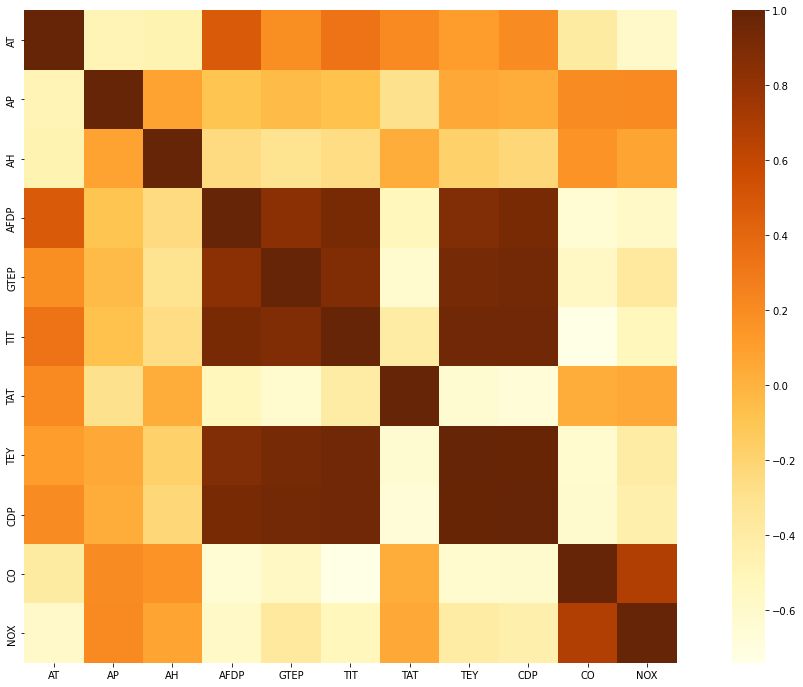

In [12]:
cormap = df.corr().round(2)
plt.figure(figsize=(20, 12))
sns.heatmap(cormap, cmap='YlOrBr', annot_kws={'size':8}, square=True, cbar = True)
plt.show()

<ul>The variables with high correlation (> |0.9|) are:
<li>AFDP and CDP.</li>
<li>AFDP and TEY.</li>
<li>GTEP and CDP.</li>
<li>GTEP and TEY.</li>
<li>TIT  and CDP.</li>
<li>TIT  and TEY.</li>
<li>TEY  and CDP.</li>
<li>AFDP and TIT.</li>
<li>GTEP and TIT.</li>
</ul>

#### Create a scatter plot of 'TEY' vs 'CDP'

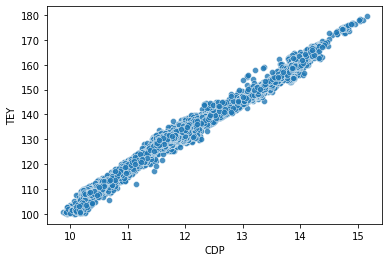

In [13]:
sns.scatterplot(x=df['CDP'], y=df['TEY'], alpha=0.8)
plt.show()

#### Create histograms for CO and NOX.

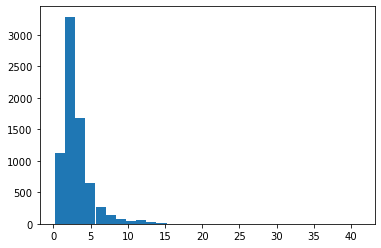

In [14]:
hplot = df['CO'].plot(kind='hist', bins=30)

# rename the y-axis to nothing
hplot.set_ylabel('')
plt.show()

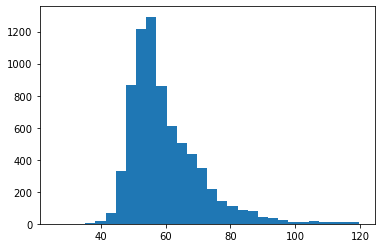

In [15]:
hplot = df['NOX'].plot(kind='hist', bins=30)

# rename the y-axis to nothing
hplot.set_ylabel('')
plt.show()

#### Create a sctter plot of CO vs NOX.

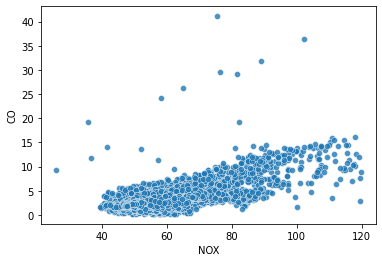

In [16]:
sns.scatterplot(x=df['NOX'], y=df['CO'], alpha=0.8)
plt.show()

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [17]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)
X_train_orig = X_train.copy()

In [19]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [20]:
X_train.shape

(5316, 9)

In [21]:
X_val.shape

(1329, 9)

In [22]:
X_test.shape

(739, 9)

In [23]:
y_train.shape

(5316,)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

In [24]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    #means = results.cv_results_['mean_test_score']
    #stds = results.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, results.cv_results_['params']):
    #    print('{:.3f} (+/-{:.2f}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
    return None

In [25]:
def deriveRSquared(var_y_true, var_y_pred):
    """Function that returns the model's R^2 """
    return metrics.r2_score(var_y_true, var_y_pred)

In [26]:
def deriveRMSE(var_y_true, var_y_pred):
    """Function that returns the model's RMSE(Root Mean Squared Error)"""
    # Using the mean_squared_error in sklearn.metrics with an extra parameter, squared, set to False.
    return metrics.mean_squared_error(var_y_true, var_y_pred, squared=False)

In [27]:
def deriveGridSearchCV(modelName,estimator, parameters, X_train, y_train, X_val, y_val, score_v):
    """
    A function that takes the base_estimator, parameters, training and validation sets as parameters' 
    values to perform a GridSearchCV with a goal of finding the best hyper parameters.
    This function prints the R^2, and RMSE scores on both training and validation.
    It also returns the model's prediction on the training and validation data. 
    """
    if score_v == 'f1':
        gs = GridSearchCV(estimator, parameters, scoring=score_v, cv=cv, n_jobs=-1)
    else:
        # derive a GridSearchCV object
        gs = GridSearchCV(estimator, parameters, scoring=score_v, cv=5, n_jobs=-1) # you can decrease the number  cross validation so that it can faster

    # fit the object with the training data.
    gs.fit(X_train, y_train)

    print_results(gs)
    print('\n')

    # output the model's prediction on the training set
    y_train_pred_gs = gs.best_estimator_.predict(X_train)

    # output the model's prediction on the validation data
    y_val_pred_gs = gs.best_estimator_.predict(X_val)

    # R^2 on the training data
    print("The model's R^2 on the training data set is %.3f."%deriveRSquared(y_train, y_train_pred_gs))

    # R^2 on the validation data
    print("The model's R^2 on the validation data set is %.3f." %deriveRSquared(y_val, y_val_pred_gs))

    # RMSE on the training data
    print("\nThe model's RMSE on the training data  is %.3f." %deriveRMSE(y_train, y_train_pred_gs))

    # RMSE on the validation data
    print("The model's RMSE on the training data  is %.3f." %deriveRMSE(y_val, y_val_pred_gs))
    
    # return the model's prediction on training and validation data
    return modelName, roundOffValue(deriveRSquared(y_train, y_train_pred_gs)), roundOffValue(deriveRSquared(y_val, y_val_pred_gs)), roundOffValue(deriveRMSE(y_train, y_train_pred_gs)), roundOffValue(deriveRMSE(y_val, y_val_pred_gs)), gs.best_estimator_

In [28]:
def deriveConfusionMatrix(y_val_cat, val_pred):
    """
    A function that the utiliizes the confusion matrix to calculate and print 
    the following metrics: Recall(Sensitivity), Specificity, Precision, Balanced Accuracy, and F1-Score 
    and also displays the confusion matrix """
    
    print('\nThe Confusion Matrix is given below:')
    # create a confusion matrix
    metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val_cat, y_pred=val_pred) 
    plt.show()

    # Using the classification report from the metrics package to calculate Recall(Sensitivity)
    #, Specificity, Precision and F1-Score.
    print('\nThe classification report is given below:')
    print(metrics.classification_report(y_val_cat, val_pred))

    # Dynamically calculating Recall(Sensitivity), Specificity, Precision, Balanced Accuracy and F1-Score
    TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val_cat, y_pred=val_pred).ravel() # return the elements of the matrix as array

    Specificity = TN/(TN+FP)

    Precision = TP/(TP+FP)

    Recall = TP/(TP+FN)

    F1Score = 2 * ((Precision * Recall)/(Precision + Recall))

    BalancedAccuracy = (Recall  + Specificity)/2

    print('Recall (Sensivity): %s' %(str(Recall.round(2))))
    print('Specificity: %s' %(str(Specificity.round(2))))
    print('Precision: %s' %(str(Precision.round(2))))
    print('Balanced Accuracy: %s' %(str(BalancedAccuracy.round(2))))
    print('F1 Score: %s' %(str(F1Score.round(2))))
    
    return roundOffValue(Recall), roundOffValue(Specificity), roundOffValue(Precision), roundOffValue(BalancedAccuracy), roundOffValue(F1Score) 

In [29]:
def deriveVIF(ds):
    """Function that returns the VIF values of the different features"""
    # create a data frame
    vif = pd.DataFrame()
    # assign the different features are values to the features column of the data frame
    vif['features'] = ds.columns
    
    # loop through each feature indice and calculate its VIF value
    vif['VIF_values'] = [variance_inflation_factor(ds.values, f) for f in range(ds.shape[1])]
    
    return vif

In [30]:
def buildTheModel(modelName, baseEstimator, X_train, y_train, X_val, y_val):
    """
    A function that returns the prediction on the training and validation data sets 
    and also prints R squared and RMSE on training and validation
    """
    
    # fit the model on the training set
    # baseEstimator.fit(X_train, y_train)
    
    # output the model's prediction on the training data
    y_train_pred = baseEstimator.predict(X_train)
    
    # output the model's prediction on the validation data
    y_val_pred = baseEstimator.predict(X_val)
    
    # R^2 on the training data
    print("The model's R^2 on the training data is %.3f." %deriveRSquared(y_train, y_train_pred))
    
    # R^2 on the validation data
    print("The model's R^2 on the validation data is %.3f." %deriveRSquared(y_val, y_val_pred))
    
    # Root Mean Squared Error (RMSE) on training data
    print("\nThe model's Root Mean Squared Error (RMSE) on the training data is %.3f." %deriveRMSE(y_train, y_train_pred))
    
    # Root Mean Squared Error (RMSE) on validation data
    print("The model's Root Mean Squared Error (RMSE) on the validation data is %.3f." %deriveRMSE(y_val, y_val_pred))
    
    r2_training = deriveRSquared(y_train, y_train_pred)
    r2_validation = deriveRSquared(y_val, y_val_pred)
    rmse_training = deriveRMSE(y_train, y_train_pred)
    rmse_validation = deriveRMSE(y_val, y_val_pred)
    
    
    # regressionModels.append(modelName, r2_training, r2_validation, rmse_training, rmse_validation)
    
    # return the model's prediction on the training and validation data sets.
    #return y_train_pred, y_val_pred
    return modelName, roundOffValue(deriveRSquared(y_train, y_train_pred)), roundOffValue(deriveRSquared(y_val, y_val_pred)), roundOffValue(deriveRMSE(y_train, y_train_pred)), roundOffValue(deriveRMSE(y_val, y_val_pred)) 

In [31]:
def roundOffValue(num):
    """A function that returns a number rounded off two decimal places"""
    return num.round(2)

In [32]:
def deriveClassifierObject(modelName, classifier, X_train, y_train, X_val, y_val):
    """function that returns the classifier's metrics after fitting the model 
    and printing the classifier's metrics, confusion matrics and classification report
    """
    
    # fit the object with the training data.
    classifier.fit(X_train, y_train_cat)

    # output the model's prediction on the training set
    y_train_pred = classifier.predict(X_train)

    
    # output the model's prediction on the validation data
    y_val_pred = classifier.predict(X_val)

    print("The model's accuracy on training is : %s" %str(roundOffValue(metrics.accuracy_score(y_true=y_train, y_pred=y_train_pred))))
    print("The model's accuracy on validation is : %s" %str(roundOffValue(metrics.accuracy_score(y_true=y_val, y_pred=y_val_pred))))

    # A helper function that prints Recall(Sensitivity), Specificity, Precision, Balanced Accuracy, and F1-Score
    # and also outputs the Confusion Matrix plus the  classification report. 
    class_Metrics=deriveConfusionMatrix(y_val_cat, y_val_pred)
    
    # print('type of class_Metrics is %s' %type(class_Metrics))
    listOfMetrics = list(class_Metrics)
    all_metrics = [modelName, 
                   roundOffValue(metrics.accuracy_score(y_true=y_train, y_pred=y_train_pred)), 
                   roundOffValue(metrics.accuracy_score(y_true=y_val_cat, y_pred=y_val_pred)), 
                  ]
    
    for item in listOfMetrics:
        all_metrics.append(item)
    
    return all_metrics # return the classifier's metrics

In [33]:
def classGridSearchCV(modelName, estimator, parameters, X_train, y_train_cat, X_val, y_val_cat, score_v):

    # perform a grid Search
    gs = GridSearchCV(estimator, parameters, scoring=score_v, cv=cv, n_jobs=-1)

    # fit the object with the training data.
    gs.fit(X_train, y_train_cat)

    print_results(gs)
    print('\n')

    # output the model's prediction on the training set
    y_train_pred_gs = gs.best_estimator_.predict(X_train)

    
    # output the model's prediction on the validation data
    y_val_pred_gs = gs.best_estimator_.predict(X_val)

    print("The model's accuracy on training is : %s" %str(roundOffValue(metrics.accuracy_score(y_true=y_train_cat, y_pred=y_train_pred_gs))))
    print("The model's accuracy on validation is : %s" %str(roundOffValue(metrics.accuracy_score(y_true=y_val_cat, y_pred=y_val_pred_gs))))

    # A helper function that prints Recall(Sensitivity), Specificity, Precision, Balanced Accuracy, and F1-Score
    # and also outputs the Confusion Matrix plus the  classification report. 
    class_Metrics=deriveConfusionMatrix(y_val_cat, y_val_pred_gs)
    
    # print('type of class_Metrics is %s' %type(class_Metrics))
    listOfMetrics = list(class_Metrics)
    all_metrics = [modelName, 
                   roundOffValue(metrics.accuracy_score(y_true=y_train_cat, y_pred=y_train_pred_gs)), 
                   roundOffValue(metrics.accuracy_score(y_true=y_val_cat, y_pred=y_val_pred_gs)), 
                  ]
    
    for item in listOfMetrics:
        all_metrics.append(item)
    
    return all_metrics, gs.best_estimator_

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# initialize a LinearRegression object
lr = LinearRegression()

In [36]:
# fit the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
# helper function that takes an initializes algorithm object, training and validation sets and returns the model's metrics 
# after fitting the model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Linear Regression',lr, X_train, y_train, X_val, y_val)

The model's R^2 on the training data is 0.664.
The model's R^2 on the validation data is 0.646.

The model's Root Mean Squared Error (RMSE) on the training data is 1.272.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.388.


In [38]:
# append the model metrics to the list
regressionModels.append(modelMetrics)

In [39]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39)]

We see that that RMSE on training and validation sets are 1.272 and 1.388 respectively. The RMSE of the validation set is much larger, which is an indicator that our model is overfitting the training data.  

## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# initialize a RandomForestRegressor object
estimator_rfr = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [42]:
# fit the model on the training data
estimator_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [43]:
# helper function that takes an initializes algorithm object, training and validation sets and returns the model's metrics 
# after fitting the model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Random Forest Regressor',estimator_rfr, X_train, y_train, X_val, y_val)

The model's R^2 on the training data is 0.964.
The model's R^2 on the validation data is 0.756.

The model's Root Mean Squared Error (RMSE) on the training data is 0.419.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.154.


In [44]:
# append the model metrics to the list
regressionModels.append(modelMetrics)

In [45]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15)]

<p>No, the training and validation scores are not close. The RMSE of 1.154 on the validation data is much larger, which is an indicator that the model is overfitting on the training data.</p>

### Using GridSearchCV to tune the different hyper-parameters

In [46]:
parameters = {
    'min_samples_split':[2, 20, 40, 120],
    'n_estimators': [100, 300, 600, 900],
    'max_depth': [10, 20, 50, 500]  
}
parameters

{'min_samples_split': [2, 20, 40, 120],
 'n_estimators': [100, 300, 600, 900],
 'max_depth': [10, 20, 50, 500]}

In [47]:
# initialize a RandomForestRegressor object
rfr = RandomForestRegressor(random_state=RANDOM_STATE)

In [48]:
%%time
# helper function that takes an initialized algorithm object, parameters, training and validation sets and returns the model's metrics 
# after performing a GridSearchCV and fitting a model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = deriveGridSearchCV('Random Forest Regressor with GridSearchCV', rfr, parameters, X_train, y_train, X_val, y_val, 'r2')

BEST PARAMS: {'max_depth': 50, 'min_samples_split': 120, 'n_estimators': 600}



The model's R^2 on the training data set is 0.792.
The model's R^2 on the validation data set is 0.745.

The model's RMSE on the training data  is 1.002.
The model's RMSE on the training data  is 1.179.
Wall time: 5min 6s


In [49]:
# retrieve the best model and assign to rfr
rfr=modelMetrics[-1]

In [50]:
modelMetrics[:-1]

('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18)

In [51]:
# append the model metrics without the best model to the list of tuples.
regressionModels.append(modelMetrics[:-1])

In [52]:
# items of the regression models list 
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18)]

<p>The model's R^2 on training is 0.792, which decreased from 0.964 and it's R^2 on the validation data is 0.745 implying that there is a difference of 0.047 which is equivalent to 0.1 so we shall stop here.</p>

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [53]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [54]:
estimator_l_SVM_R = SVR(kernel='linear')

In [55]:
# fit the model on the training set
estimator_l_SVM_R.fit(X_train, y_train)

SVR(kernel='linear')

In [56]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Linear SVM Regressor',estimator_l_SVM_R, X_train, y_train, X_val, y_val)

The model's R^2 on the training data is 0.624.
The model's R^2 on the validation data is 0.602.

The model's Root Mean Squared Error (RMSE) on the training data is 1.345.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.473.


In [57]:
# append the model metrics to the list of tuples.
regressionModels.append(modelMetrics)

In [58]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47)]

<p>The model's R^2 on both training and validation data is 0.624 and 0.602 respectively. The model's RMSE on validation, which is 1.473, is much larger implying that the model is overfitting on the training data. But since the difference between the model's R^2 on training and validation data is less than 0.1, there is no need to fine tune the different hyper-parameters of Linear SVM Regressor. </p>

### Polynomial Kernel SVM Regressor

In [59]:
from sklearn.svm import SVR
estimator_Poly_K_SVM_R = SVR(kernel='poly')

In [60]:
# fit the model on the training data
estimator_Poly_K_SVM_R.fit(X_train, y_train)

SVR(kernel='poly')

In [61]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Polynomial Kernel SVM Regressor', estimator_Poly_K_SVM_R, X_train, y_train, X_val, y_val)

The model's R^2 on the training data is 0.740.
The model's R^2 on the validation data is 0.731.

The model's Root Mean Squared Error (RMSE) on the training data is 1.118.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.211.


In [62]:
# append the model metrics to the list of tuples
regressionModels.append(modelMetrics)

In [63]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21)]

<p>The <b>Polynomial Kernel SVM Regressor</b> model's R^2 on both training and validation data is 0.740 and 0.731 respectively. Also, there is a difference of 0.01 in the R^2 scores between training and validation data. The model's RMSE on validation, which is 1.211 is much larger than training implying that the model is overfitting on the training data.</p>

### RBF Kernel SVM Regressor

In [64]:
from sklearn.svm import SVR
estimator_rbf_K_SVM_R = SVR(kernel='rbf')

In [65]:
# fit the model on training data
estimator_rbf_K_SVM_R.fit(X_train, y_train)

SVR()

In [66]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('RBF Kernel SVM Regressor', estimator_rbf_K_SVM_R, X_train, y_train, X_val, y_val)

The model's R^2 on the training data is 0.765.
The model's R^2 on the validation data is 0.748.

The model's Root Mean Squared Error (RMSE) on the training data is 1.063.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.173.


In [67]:
# append the model metrics to the list of tuples
regressionModels.append(modelMetrics)

In [68]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17)]

<p>The <b>RBF Kernel SVM Regressor</b> model's R^2 on both training and validation data is 0.765 and 0.748 respectively with a difference of 0.02 between training and validation R^2 scores. The model's RMSE on validation, which is 1.173 is much larger than training implying that the model is overfitting on the training data.</p>

### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
from sklearn.svm import SVR
gridSCV_rbf_K_SVR = SVR(kernel='rbf')

In [71]:
parameters = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1] 
}
parameters

{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}

In [72]:
%%time
# helper function that takes an initialized algorithm object, parameters, training and validation sets and returns the model's metrics 
# after performing a GridSearchCV and fitting a model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = deriveGridSearchCV('RBF Kernel SVR with GridSearch', gridSCV_rbf_K_SVR, parameters, X_train, y_train, X_val, y_val, 'r2')

BEST PARAMS: {'C': 1000, 'gamma': 0.01}



The model's R^2 on the training data set is 0.792.
The model's R^2 on the validation data set is 0.757.

The model's RMSE on the training data  is 1.000.
The model's RMSE on the training data  is 1.151.
Wall time: 2min 53s


In [73]:
# let's retrieve the best model and assign it to the avariable
gridSCV_rbf_K_SVR = modelMetrics[-1]

In [74]:
gridSCV_rbf_K_SVR

SVR(C=1000, gamma=0.01)

In [75]:
# append the model metrics to the list of tuples without the best model
regressionModels.append(modelMetrics[:-1])

In [76]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15)]

<p>This increases $R^2$.</p> 

## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression with hyper parameter tuning using the models: 
    - Linear Regression
    - Random Forest Regression
    - RBF Kernel Support Vector Regression
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR model` from before. Do you observe any change in performance? Please explain. 


In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=None)

# fit the model using the training data
pca.fit(X_train)

# transform training, validation, testing data sets using the same model parameters
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


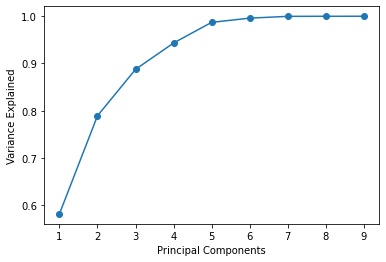

In [79]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [80]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [81]:
lr_with_PCA_transformed_data = LinearRegression()

In [82]:
# fit the model with PCA transformed data
lr_with_PCA_transformed_data.fit(X_train_pca2, y_train)

LinearRegression()

In [83]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Linear Regression with PCA transformed data',lr_with_PCA_transformed_data, X_train_pca2, y_train, X_val_pca2, y_val)

The model's R^2 on the training data is 0.656.
The model's R^2 on the validation data is 0.633.

The model's Root Mean Squared Error (RMSE) on the training data is 1.287.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.414.


In [84]:
# append the model metrics to the list of tuples.
regressionModels.append(modelMetrics)

In [85]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41)]

<p>Comparing both the linear Regression without PCA transformed data and the one with PCA transformed data, $R^2$ on the validation data set decreased from 0.646 to 0.633 when we used Linear Regression with PCA transformed data.</p>
<p>Also, the Root Mean Squared Error increased on both the training and validation data by applying the linear regression with PCA tranformed data.</p>

**RF Regression with PCA transformed data**

In [86]:
rfr_With_PCA_transformed_data = RandomForestRegressor(random_state=RANDOM_STATE)

In [87]:
# fit the model on the PCA transformed data
rfr_With_PCA_transformed_data.fit(X_train_pca2, y_train)

RandomForestRegressor(random_state=0)

In [88]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Random Forest Regressor with PCA transformed data', rfr_With_PCA_transformed_data, X_train_pca2, y_train, X_val_pca2, y_val)

The model's R^2 on the training data is 0.963.
The model's R^2 on the validation data is 0.737.

The model's Root Mean Squared Error (RMSE) on the training data is 0.422.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.197.


In [89]:
# append the model metrics to the list of tuples.
regressionModels.append(modelMetrics)

In [90]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41),
 ('Random Forest Regressor with PCA transformed data', 0.96, 0.74, 0.42, 1.2)]

<p>The RSME of 1.197 on the validation data is much larger than that on the training data, which is an indicator that the model is overfitting on the training data.</p>

### Applying GridSearchCV to tune the different hyper-parameters

In [91]:
parameters = {
    'min_samples_split':[2, 20, 40, 120],
    'n_estimators': [100, 300, 600],
    'max_depth': [10, 20, 100],
    'min_samples_leaf':[10, 20, 1000]
}
parameters

{'min_samples_split': [2, 20, 40, 120],
 'n_estimators': [100, 300, 600],
 'max_depth': [10, 20, 100],
 'min_samples_leaf': [10, 20, 1000]}

In [92]:
# initialize a RandomForestRegressor object
rfr_GS_With_PCA_transformed_data = RandomForestRegressor(random_state=RANDOM_STATE)

In [93]:
%%time
# helper function that takes an initialized algorithm object, parameters, training and validation sets and returns the model's metrics 
# after performing a GridSearchCV and fitting a model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = deriveGridSearchCV('GridSearchCV Random Forest Regressor with PCA transformed data', rfr_GS_With_PCA_transformed_data, parameters, X_train_pca2, y_train, X_val_pca2, y_val, 'r2')

BEST PARAMS: {'max_depth': 100, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 600}



The model's R^2 on the training data set is 0.800.
The model's R^2 on the validation data set is 0.750.

The model's RMSE on the training data  is 0.981.
The model's RMSE on the training data  is 1.168.
Wall time: 2min 18s


In [94]:
# let's retrieve the best model and assign it to the avariable
rfr_GS_With_PCA_transformed_data = modelMetrics[-1]

In [95]:
# append the model metrics to the list of tuples without the best model
regressionModels.append(modelMetrics[:-1])

In [96]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41),
 ('Random Forest Regressor with PCA transformed data', 0.96, 0.74, 0.42, 1.2),
 ('GridSearchCV Random Forest Regressor with PCA transformed data',
  0.8,
  0.75,
  0.98,
  1.17)]

<p>Comparing this model with its counterpart obtained before, $R^2$ is 0.8 on training and 0.75 on validation so there is change in the model's performance, however, the model's RMSE on both training and validation didn't change much.</p>  

**SVM Regression with PCA transformed data**

In [97]:
rbf_K_SVR_With_PCA_transformed_data = SVR(kernel='rbf')

In [98]:
# fit the model on the PCA transformed data
rbf_K_SVR_With_PCA_transformed_data.fit(X_train_pca2, y_train)

SVR()

In [99]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('RBF Kernel SVR with PCA transformed data', rbf_K_SVR_With_PCA_transformed_data, X_train_pca2, y_train, X_val_pca2, y_val)

The model's R^2 on the training data is 0.760.
The model's R^2 on the validation data is 0.747.

The model's Root Mean Squared Error (RMSE) on the training data is 1.075.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.175.


In [100]:
# append the model metrics to the list of tuples without the best model
regressionModels.append(modelMetrics)

In [101]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41),
 ('Random Forest Regressor with PCA transformed data', 0.96, 0.74, 0.42, 1.2),
 ('GridSearchCV Random Forest Regressor with PCA transformed data',
  0.8,
  0.75,
  0.98,
  1.17),
 ('RBF Kernel SVR with PCA transformed data', 0.76, 0.75, 1.07, 1.17)]

### Applying GridSearchCV to tune different hyper-parameters

In [102]:
parameters = {
    'C': [1, 10, 100, 1000],
'gamma': [0.001, 0.01, 0.1, 1] 
}
parameters

{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}

In [103]:
gridSearchCV_rbf_K_SVR_with_PCA_transformed_data = SVR(kernel='rbf')

In [104]:
%%time
# helper function that takes an initialized algorithm object, parameters, training and validation sets and returns the model's metrics 
# after performing a GridSearchCV and fitting a model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = deriveGridSearchCV('GridSearchCV RBF Kernel SVR with PCA transformed data', gridSearchCV_rbf_K_SVR_with_PCA_transformed_data, parameters, X_train_pca2, y_train, X_val_pca2, y_val, 'r2')

BEST PARAMS: {'C': 1000, 'gamma': 0.01}



The model's R^2 on the training data set is 0.785.
The model's R^2 on the validation data set is 0.752.

The model's RMSE on the training data  is 1.017.
The model's RMSE on the training data  is 1.163.
Wall time: 4min 40s


In [105]:
# let's retrieve the best model and assign it to the variable
gridSearchCV_rbf_K_SVR_with_PCA_transformed_data= modelMetrics[-1]

In [106]:
# append the model metrics to the list of tuples without the best model
regressionModels.append(modelMetrics[:-1])

In [107]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41),
 ('Random Forest Regressor with PCA transformed data', 0.96, 0.74, 0.42, 1.2),
 ('GridSearchCV Random Forest Regressor with PCA transformed data',
  0.8,
  0.75,
  0.98,
  1.17),
 ('RBF Kernel SVR with PCA transformed data', 0.76, 0.75, 1.07, 1.17),
 ('GridSearchCV RBF Kernel SVR with PCA transformed data',
  0.79,
  0.75,
  1.02,
  1.16)]

<p>Comparing PCA RBF SVR with RBF SVR model, $R^2$ on training data is the same and it decreased by 0.01 on validation when we use PCA RBF SVR. From my observation there is no change in performance since the difference between training and validation $R^2$ is the same in both models.</p>
<p>Also, the model RMSE on training on training is 1.017 when PCA RBF SVR is applied where as in RBF SVR model, it is 1.00 so there was increase in the RMSE, which is not good. The same applies to the RMSE on validation, there is an increase in the RMSE scores. I would prefer to use the RBF SVR model since using PCA RBF SVR doesn't make the model's performance any better. </p>

## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [108]:
from sklearn.preprocessing import Binarizer

In [109]:
binarizer = Binarizer(threshold=3)

In [110]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [111]:
y_train_cat = pd.Series(y_train_cat)

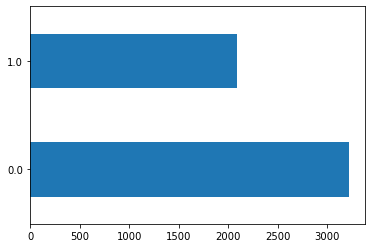

In [112]:
y_train_cat.value_counts().plot.barh()
plt.show()

In [113]:
# QA
y_val_cat.shape

(1329,)

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [114]:
from sklearn.svm import SVC

In [115]:
gridSearchCV_rbf_K_SVC = SVC(kernel ='rbf')

#### SVC Model 1 

In [116]:
parameters = {
    'C': [1, 10, 100, 1000],
'gamma': [0.001, 0.01, 0.1, 1] 
}
parameters

{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}

BEST PARAMS: {'C': 1, 'gamma': 1}



The model's accuracy on training is : 0.94
The model's accuracy on validation is : 0.91

The Confusion Matrix is given below:


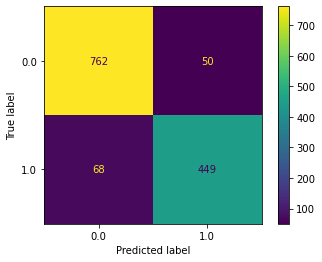


The classification report is given below:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.87      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329

Recall (Sensivity): 0.87
Specificity: 0.94
Precision: 0.9
Balanced Accuracy: 0.9
F1 Score: 0.88
Wall time: 16.7 s


In [117]:
%%time
# A helper function that returns the model's prediction accuracy on training and validation data 
# after performing GridSearchCv to tune the different hyperparameters which it uses to fit the model 
# and also prints the different metrics
classifierMetrics, gridSearchCV_rbf_K_SVC = classGridSearchCV('GridSearchCV RBF Kernel SVC', gridSearchCV_rbf_K_SVC, parameters, X_train, y_train_cat, X_val, y_val_cat, 'f1')

In [118]:
# this is the best model
gridSearchCV_rbf_K_SVC

SVC(C=1, gamma=1)

In [119]:
# add the list of the classifier metrics to the list of classification models
classificationModels.append(classifierMetrics)

In [120]:
classificationModels

[['GridSearchCV RBF Kernel SVC', 0.94, 0.91, 0.87, 0.94, 0.9, 0.9, 0.88]]

#### SVC Model 2

### using the pca transformed data X_train_pca2 and X_val_pca2

In [121]:
gridSearchCV_rbf_K_SVC_With_PCA_transformed_data = SVC(kernel ='rbf')

In [122]:
parameters = {
    'C': [1, 10, 100, 1000],
'gamma': [0.001, 0.01, 0.1, 1] 
}
parameters

{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}

BEST PARAMS: {'C': 1, 'gamma': 1}



The model's accuracy on training is : 0.93
The model's accuracy on validation is : 0.91

The Confusion Matrix is given below:


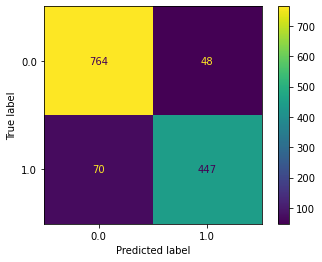


The classification report is given below:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.86      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329

Recall (Sensivity): 0.86
Specificity: 0.94
Precision: 0.9
Balanced Accuracy: 0.9
F1 Score: 0.88
Wall time: 16.9 s


In [123]:
%%time
# A helper function that returns the model's prediction accuracy on training and validation data 
# after performing GridSearchCv to tune the different hyperparameters which it uses to fit the model 
# and also prints the different metrics
classifierMetrics, gridSearchCV_rbf_K_SVC_With_PCA_transformed_data = classGridSearchCV('GridSearchCV RBF Kernel SVC With PCA transformed data', gridSearchCV_rbf_K_SVC_With_PCA_transformed_data, parameters, X_train_pca2, y_train_cat, X_val_pca2, y_val_cat, 'f1')

In [124]:
# this is our best model
gridSearchCV_rbf_K_SVC_With_PCA_transformed_data

SVC(C=1, gamma=1)

In [125]:
# add the list of the classifier metrics to the list of classification models
classificationModels.append(classifierMetrics)

In [126]:
classificationModels

[['GridSearchCV RBF Kernel SVC', 0.94, 0.91, 0.87, 0.94, 0.9, 0.9, 0.88],
 ['GridSearchCV RBF Kernel SVC With PCA transformed data',
  0.93,
  0.91,
  0.86,
  0.94,
  0.9,
  0.9,
  0.88]]

<p>Comparing Standardized training data and PCA transformed training data, Recall is 0.87 when standardized training data is utilized and 0.86 when PCA transformed data is used. So, there is a reduction in Recall (Sensitivity) when PCA tranformed training data is used.</p>
<p>The rest of the other metric scores values for Specificity, Precision, Balanced Accuracy and F1-Score did not change.</p>

## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

<p><b>Multicollinearity</b> could be one of the reasons why we are experiencing poor performance so we need to care of it by deriving a correlation matrix where we shall look at the relationships between the bivariant variables and also run VIF function where we shall exclude all those variables with VIF values exceeding 5.</p>

In [127]:
X_train_orig.corr(method='pearson').round(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
AT,1.00,-0.49,-0.48,0.47,0.20,0.33,0.20,0.11,0.21
AP,-0.49,1.00,0.09,-0.10,-0.05,-0.08,-0.28,0.04,0.02
AH,-0.48,0.09,1.00,-0.26,-0.30,-0.27,0.03,-0.19,-0.23
AFDP,0.47,-0.10,-0.26,1.00,0.84,0.91,-0.52,0.88,0.92
GTEP,0.20,-0.05,-0.30,0.84,1.00,0.89,-0.62,0.93,0.94
TIT,0.33,-0.08,-0.27,0.91,0.89,1.00,-0.40,0.95,0.95
TAT,0.20,-0.28,0.03,-0.52,-0.62,-0.40,1.00,-0.63,-0.66
TEY,0.11,0.04,-0.19,0.88,0.93,0.95,-0.63,1.00,0.99
CDP,0.21,0.02,-0.23,0.92,0.94,0.95,-0.66,0.99,1.00


In [128]:
tcolumns = X_train_orig.columns

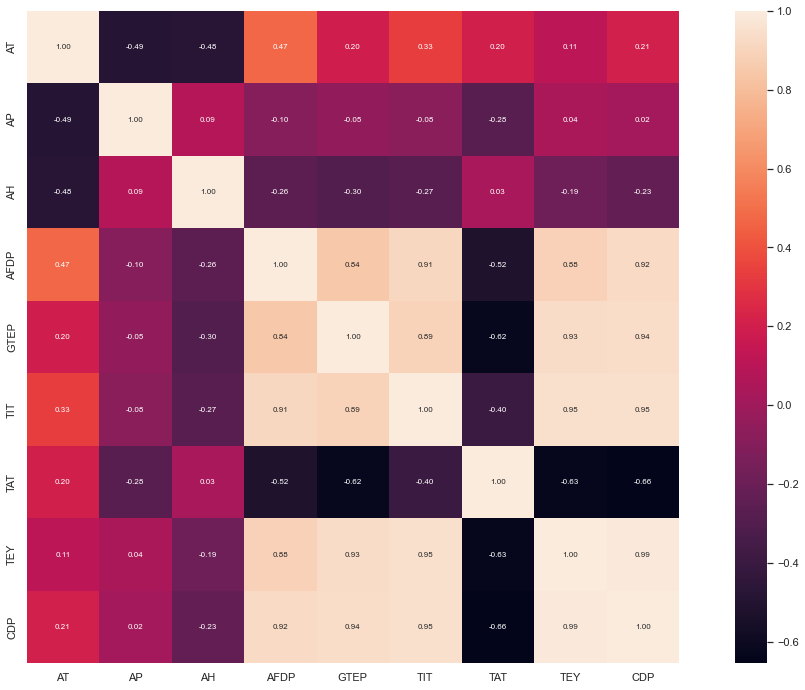

In [129]:
# create a correlation heatmap
corrmat = np.corrcoef(X_train_orig[tcolumns].values.T) # let's derive a transposed numpy array
# corrmat
sns.set(font_scale=2.0) # set the font
sns.set(rc={'figure.figsize': (20, 12)}) # set figure size
hmap = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8}, yticklabels=tcolumns, xticklabels=tcolumns)
plt.show()

<ul>From the above correlation matrix, we see that:
<li>GTEP and AFDP are highly correllated.</li>
<li>TEY and AFDP are highly correllated.</li>
<li>TIT and AFDP are highly correllated.</li>
<li>CDP and AFDP are highly correllated.</li>
<li>TIT and GTEP are highly correllated.</li>
<li>TEY and GTEP are highly correllated.</li>
<li>CDP and GTEP are highly correllated.</li>
<li>TEY and TIT are highly correllated.</li>
<li>TEY and CDP are highly correllated.</li>
<li>TIT and CDP are highly correllated.</li>
</ul>

<p>Then using VIF, we need to exclude all those variables with high VIF values exceeding 5.</p>

In [130]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [131]:
# convert X_train into a pandas data frame
df_X_train = pd.DataFrame(X_train, columns = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'])
df_X_train_ver2 = df_X_train.copy()
#df_X_train 

In [132]:
ds = df_X_train.copy() # make a copy of the origanl data set
# a helper function that returns the VIF values of the different features
deriveVIF(ds)

,features,VIF_values
0,AT,16.65754
1,AP,1.90902
2,AH,1.80366
3,AFDP,19.98047
4,GTEP,10.67075
5,TIT,841.20811
6,TAT,99.40907
7,TEY,610.04739
8,CDP,587.35429


In [133]:
ds.drop(['TIT'], axis=1, inplace=True) # drop the column from the pandas data frame

# a helper function that returns the VIF values of the different features
deriveVIF(ds)

,features,VIF_values
0,AT,11.16069
1,AP,1.73165
2,AH,1.78906
3,AFDP,18.95543
4,GTEP,10.45583
5,TAT,5.55776
6,TEY,297.15934
7,CDP,373.91661


In [134]:
ds.drop(['TEY'], axis=1, inplace=True) # drop the column from the pandas data frame

# a helper function that returns the VIF values of the different features
deriveVIF(ds)

,features,VIF_values
0,AT,4.80071
1,AP,1.59398
2,AH,1.76693
3,AFDP,18.95345
4,GTEP,10.41597
5,TAT,2.29871
6,CDP,27.31655


In [135]:
ds.drop(['CDP'], axis=1, inplace=True) # drop the column from the pandas data frame

# a helper function that returns the VIF values of the different features
deriveVIF(ds)

,features,VIF_values
0,AT,3.89430
1,AP,1.59040
2,AH,1.74298
3,AFDP,7.45087
4,GTEP,5.99547
5,TAT,2.27982


In [136]:
ds.drop(['AFDP'], axis=1, inplace=True) # drop the column from the pandas data frame

# a helper function that returns the VIF values of the different features
deriveVIF(ds)

,features,VIF_values
0,AT,1.84906
1,AP,1.45290
2,AH,1.42961
3,GTEP,2.12599
4,TAT,2.12488


In [137]:
ds.corr(method='pearson').round(2)

,AT,AP,AH,GTEP,TAT
AT,1.00000,-0.49000,-0.48000,0.20000,0.20000
AP,-0.49000,1.00000,0.09000,-0.05000,-0.28000
AH,-0.48000,0.09000,1.00000,-0.30000,0.03000
GTEP,0.20000,-0.05000,-0.30000,1.00000,-0.62000
TAT,0.20000,-0.28000,0.03000,-0.62000,1.00000


<p>Running the correlation matrix again:</p>

In [138]:
tcolumns = ds.columns

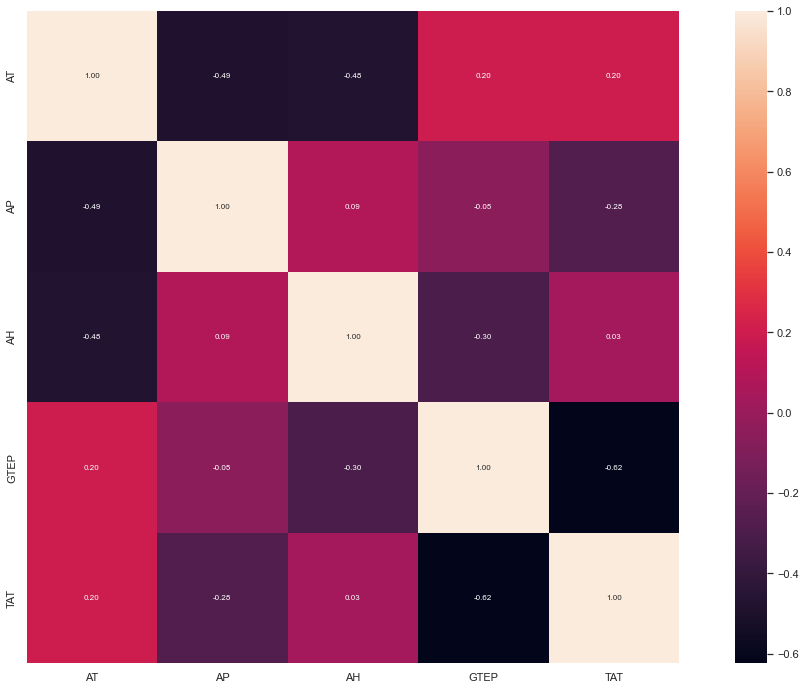

In [139]:
# create a correlation heatmap
corrmat = np.corrcoef(ds[tcolumns].values.T) # let's derive a transposed numpy array
# corrmat
sns.set(font_scale=4.0) # set the font
sns.set(rc={'figure.figsize': (20, 12)}) # set figure size
hmap = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8}, yticklabels=tcolumns, xticklabels=tcolumns)
plt.show()

    - We can see that there is no more multicollinearity amongst the independent variables.

In [140]:
ds.columns

Index(['AT', 'AP', 'AH', 'GTEP', 'TAT'], dtype='object')

 - Let's convert the transformed X_val into a data frame then use the Data frame to extract out the variables of interest which didn't have any collinearity amongst themselves


In [141]:
df_X_val = pd.DataFrame(X_val, columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'])

In [142]:
df_X_val.head() # display the first 5 records

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,-1.42171,0.23588,0.78322,-1.73708,-1.09364,-2.35257,-1.24040,-1.58392,-1.43528
1,0.37048,-0.78703,0.68615,0.18626,-0.34035,-0.02203,0.64197,-0.20474,-0.30679
2,-1.34982,1.37404,0.83823,0.66399,1.40485,1.05244,-2.22939,1.71957,1.57843
3,-1.09037,0.92742,0.80918,-1.65224,-1.73201,-1.77245,0.31476,-1.53823,-1.57766
4,-0.15291,0.75454,-0.13542,1.05019,1.12876,1.02217,-1.40401,1.22507,1.27433


In [143]:
# extract out the variables of interest and create a new X_val data frame
e_X_val = df_X_val[ds.columns]
e_X_train = ds

In [144]:
e_X_val.head() # display the top 5 records

,AT,AP,AH,GTEP,TAT
0,-1.42171,0.23588,0.78322,-1.09364,-1.24040
1,0.37048,-0.78703,0.68615,-0.34035,0.64197
2,-1.34982,1.37404,0.83823,1.40485,-2.22939
3,-1.09037,0.92742,0.80918,-1.73201,0.31476
4,-0.15291,0.75454,-0.13542,1.12876,-1.40401


In [145]:
# display the top 5 records
e_X_train.head()

,AT,AP,AH,GTEP,TAT
0,-0.67471,1.48930,-1.56867,-0.34079,0.63278
1,1.49278,-0.16752,-1.01861,0.89150,-0.39848
2,0.58082,-1.17602,0.91802,-0.27772,0.56477
3,0.32550,-0.52770,0.83999,-0.48827,0.67874
4,0.26948,-1.27687,-0.69614,-0.44943,0.69345


 - Let's build a linearRegression model

In [146]:
# convert the pandas Data frames to numpy arrays
e_X_train = e_X_train.to_numpy()
e_X_val = e_X_val.to_numpy()

In [147]:
# initialize a Linear Regression object
m_lr = LinearRegression()

In [148]:
# fit the model on training data using the un correlated variables
m_lr.fit(e_X_train, y_train)

LinearRegression()

In [149]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Linear Regression Performance Improvement With out multi-collinearity',m_lr, e_X_train, y_train, e_X_val, y_val)

The model's R^2 on the training data is 0.545.
The model's R^2 on the validation data is 0.509.

The model's Root Mean Squared Error (RMSE) on the training data is 1.481.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.636.


In [150]:
# add the model's metrics to the list of regression models
regressionModels.append(modelMetrics)

In [151]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41),
 ('Random Forest Regressor with PCA transformed data', 0.96, 0.74, 0.42, 1.2),
 ('GridSearchCV Random Forest Regressor with PCA transformed data',
  0.8,
  0.75,
  0.98,
  1.17),
 ('RBF Kernel SVR with PCA transformed data', 0.76, 0.75, 1.07, 1.17),
 ('GridSearchCV RBF Kernel SVR with PCA transformed data',
  0.79,
  0.75,
  1.02,
  1.16),
 ('Linear Regression Performance Improvement With out multi-collinearity',
  0.54,
  0.51,
  1.48,
  1.64)]

<p>$R^2$ decreased on both training and validation so the model performance didn't improve, so we are going to experiment with the RandomForestRegressor.</p>

In [152]:
m_rfr = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [153]:
# fit the model on the training un correlated data set.
m_rfr.fit(e_X_train, y_train)

RandomForestRegressor(random_state=0)

In [154]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Random Forest Regressor Performance Improvement With out multi-collinearity',m_rfr, e_X_train, y_train, e_X_val, y_val)

The model's R^2 on the training data is 0.955.
The model's R^2 on the validation data is 0.701.

The model's Root Mean Squared Error (RMSE) on the training data is 0.465.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.277.


In [155]:
# add the model's metrics to the list of regression models
regressionModels.append(modelMetrics)

In [156]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41),
 ('Random Forest Regressor with PCA transformed data', 0.96, 0.74, 0.42, 1.2),
 ('GridSearchCV Random Forest Regressor with PCA transformed data',
  0.8,
  0.75,
  0.98,
  1.17),
 ('RBF Kernel SVR with PCA transformed data', 0.76, 0.75, 1.07, 1.17),
 ('GridSearchCV RBF Kernel SVR with PCA transformed data',
  0.79,
  0.75,
  1.02,
  1.16),
 ('Linear Regression Performance Improvement With out multi-collinearity',
  0.54,
  0.51,
  1.48,
  1.64),
 ('Random Forest Regressor Performance Improvement With out multi-collineari

<p>Using RandomForestRegressor did not improve $R^2$ and RMSE on both training and validation data sets.</p>

## Linear Trees

- Here we shall explore a **Linear Tree Regressor** which is a meta-estimator that combines the learning ability of Decision Tree and the predictive power of linear models.

In [157]:
from lineartree import LinearTreeRegressor #, LinearForestRegressor, LinearBoostRegressor
lr = LinearRegression()
ltr = LinearTreeRegressor(base_estimator=lr, criterion='rmse')

In [158]:
ltr.fit(X_train, y_train)

LinearTreeRegressor(base_estimator=LinearRegression(), criterion='rmse')

In [159]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Linear Tree Regressor',ltr, X_train, y_train, X_val, y_val)

The model's R^2 on the training data is 0.774.
The model's R^2 on the validation data is 0.746.

The model's Root Mean Squared Error (RMSE) on the training data is 1.042.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.176.


In [160]:
# add the model's metrics to the list of regression models
regressionModels.append(modelMetrics)

In [161]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41),
 ('Random Forest Regressor with PCA transformed data', 0.96, 0.74, 0.42, 1.2),
 ('GridSearchCV Random Forest Regressor with PCA transformed data',
  0.8,
  0.75,
  0.98,
  1.17),
 ('RBF Kernel SVR with PCA transformed data', 0.76, 0.75, 1.07, 1.17),
 ('GridSearchCV RBF Kernel SVR with PCA transformed data',
  0.79,
  0.75,
  1.02,
  1.16),
 ('Linear Regression Performance Improvement With out multi-collinearity',
  0.54,
  0.51,
  1.48,
  1.64),
 ('Random Forest Regressor Performance Improvement With out multi-collineari

### Using GridSearchCV

In [162]:
parameters = {
    'min_samples_split':[6,  120],
    'min_samples_leaf':[10, 1000],
    'criterion': ['mse', 'rmse'],
    'max_depth': [5, 19],
    'max_bins': [11, 115]
}
parameters

{'min_samples_split': [6, 120],
 'min_samples_leaf': [10, 1000],
 'criterion': ['mse', 'rmse'],
 'max_depth': [5, 19],
 'max_bins': [11, 115]}

In [163]:
lr=LinearRegression()
ltr_With_GridSearch = LinearTreeRegressor(base_estimator=lr)

In [164]:
%%time
# helper function that takes an initialized algorithm object, parameters, training and validation sets and returns the model's metrics 
# after performing a GridSearchCV and fitting a model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = deriveGridSearchCV('Linear Tree Regressor With GridSearchCV', ltr_With_GridSearch, parameters, X_train, y_train, X_val, y_val, 'r2')

BEST PARAMS: {'criterion': 'mse', 'max_bins': 11, 'max_depth': 5, 'min_samples_leaf': 1000, 'min_samples_split': 6}



The model's R^2 on the training data set is 0.771.
The model's R^2 on the validation data set is 0.710.

The model's RMSE on the training data  is 1.049.
The model's RMSE on the training data  is 1.257.
Wall time: 4min 30s


In [165]:
# let's retrieve the best model and assign it to the variable
ltr_With_GridSearch= modelMetrics[-1]

In [166]:
# append the model metrics to the list of tuples without the best model
regressionModels.append(modelMetrics[:-1])

In [167]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41),
 ('Random Forest Regressor with PCA transformed data', 0.96, 0.74, 0.42, 1.2),
 ('GridSearchCV Random Forest Regressor with PCA transformed data',
  0.8,
  0.75,
  0.98,
  1.17),
 ('RBF Kernel SVR with PCA transformed data', 0.76, 0.75, 1.07, 1.17),
 ('GridSearchCV RBF Kernel SVR with PCA transformed data',
  0.79,
  0.75,
  1.02,
  1.16),
 ('Linear Regression Performance Improvement With out multi-collinearity',
  0.54,
  0.51,
  1.48,
  1.64),
 ('Random Forest Regressor Performance Improvement With out multi-collineari

- We could also explore using **regularization** especially when several features are strongly correlated like in our case, so we shall use **Elastic Net** which is a combination of Ridge and Lasso regression.

In [168]:
from sklearn.linear_model import ElasticNet

In [169]:
elasticNet_With_GridSearchCV = ElasticNet(selection='random', random_state=RANDOM_STATE)
parameters={'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
           'l1_ratio': [0.10 ,0.25, 0.5, 0.75],
            'max_iter':[1000, 1500, 2000]
           }
parameters

{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
 'l1_ratio': [0.1, 0.25, 0.5, 0.75],
 'max_iter': [1000, 1500, 2000]}

In [170]:
%%time
# helper function that takes an initialized algorithm object, parameters, training and validation sets and returns the model's metrics 
# after performing a GridSearchCV and fitting a model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = deriveGridSearchCV('ElasticNet With GridSearchCV', elasticNet_With_GridSearchCV, parameters, X_train, y_train, X_val, y_val, 'r2')

BEST PARAMS: {'alpha': 1e-05, 'l1_ratio': 0.1, 'max_iter': 2000}



The model's R^2 on the training data set is 0.664.
The model's R^2 on the validation data set is 0.646.

The model's RMSE on the training data  is 1.272.
The model's RMSE on the training data  is 1.388.
Wall time: 1.26 s


C:\Users\REJALU\.conda\envs\renv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.267e+03, tolerance: 2.560e+00
  model = cd_fast.enet_coordinate_descent(


In [171]:
# let's retrieve the best model and assign it to the variable
elasticNet_With_GridSearchCV = modelMetrics[-1]

In [172]:
# append the model metrics to the list of tuples without the best model
regressionModels.append(modelMetrics[:-1])

In [173]:
regressionModels

[('Linear Regression', 0.66, 0.65, 1.27, 1.39),
 ('Random Forest Regressor', 0.96, 0.76, 0.42, 1.15),
 ('Random Forest Regressor with GridSearchCV', 0.79, 0.75, 1.0, 1.18),
 ('Linear SVM Regressor', 0.62, 0.6, 1.34, 1.47),
 ('Polynomial Kernel SVM Regressor', 0.74, 0.73, 1.12, 1.21),
 ('RBF Kernel SVM Regressor', 0.77, 0.75, 1.06, 1.17),
 ('RBF Kernel SVR with GridSearch', 0.79, 0.76, 1.0, 1.15),
 ('Linear Regression with PCA transformed data', 0.66, 0.63, 1.29, 1.41),
 ('Random Forest Regressor with PCA transformed data', 0.96, 0.74, 0.42, 1.2),
 ('GridSearchCV Random Forest Regressor with PCA transformed data',
  0.8,
  0.75,
  0.98,
  1.17),
 ('RBF Kernel SVR with PCA transformed data', 0.76, 0.75, 1.07, 1.17),
 ('GridSearchCV RBF Kernel SVR with PCA transformed data',
  0.79,
  0.75,
  1.02,
  1.16),
 ('Linear Regression Performance Improvement With out multi-collinearity',
  0.54,
  0.51,
  1.48,
  1.64),
 ('Random Forest Regressor Performance Improvement With out multi-collineari

- We could optimize our model by using **Stochastic Gradient Descent Regressor**, which fits a linear regressors under the convex loss functions.

In [174]:
### Using SGDRegressor
parameters = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
    'penalty':['l2', 'l1', 'elasticnet'],
    'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.10 ,0.25, 0.5, 0.75],
    'max_iter':[1000, 1500, 2000],
    #'tol': [0.001, 0.009],
    'learning_rate' : ['constant','optimal','invscaling','adaptive']
}
parameters

{'loss': ['squared_error',
  'huber',
  'epsilon_insensitive',
  'squared_epsilon_insensitive'],
 'penalty': ['l2', 'l1', 'elasticnet'],
 'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
 'l1_ratio': [0.1, 0.25, 0.5, 0.75],
 'max_iter': [1000, 1500, 2000],
 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']}

In [175]:
sgd = SGDRegressor()

In [176]:
%%time
# helper function that takes an initialized algorithm object, parameters, training and validation sets and returns the model's metrics 
# after performing a GridSearchCV and fitting a model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = deriveGridSearchCV('Stochastic Gradient Descent With GridSearchCV', sgd, parameters, X_train, y_train, X_val, y_val, 'r2')

BEST PARAMS: {'alpha': 1e-05, 'l1_ratio': 0.5, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l2'}



The model's R^2 on the training data set is 0.664.
The model's R^2 on the validation data set is 0.647.

The model's RMSE on the training data  is 1.273.
The model's RMSE on the training data  is 1.388.
Wall time: 1min 31s


In [177]:
# let's retrieve the best model and assign it to the variable
sgd_With_GridSearchCV= modelMetrics[-1]

In [178]:
# append the model metrics to the list of tuples without the best model
regressionModels.append(modelMetrics[:-1])

<p>Neither does $R^2$ nor $RMSE$ improve when we use the Stochastic Gradient Descent Regressor. </p>

- We can also explore adding **interaction terms** to our data set.

In [179]:
inter_terms = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_inter = inter_terms.fit_transform(X_train)
X_val_inter = inter_terms.fit_transform(X_val)

In [180]:
lr_With_Inter_terms=LinearRegression()

In [181]:
lr_With_Inter_terms.fit(X_train_inter, y_train)

LinearRegression()

In [182]:
# helper function that takes an initialized algorithm object, training and validation sets and returns the model's metrics 
# after  deriving the accuracy on both training and validation data.
modelMetrics = buildTheModel('Linear Regression With interaction Terms',lr_With_Inter_terms, X_train_inter, y_train, X_val_inter, y_val)

The model's R^2 on the training data is 0.767.
The model's R^2 on the validation data is 0.741.

The model's Root Mean Squared Error (RMSE) on the training data is 1.060.
The model's Root Mean Squared Error (RMSE) on the validation data is 1.189.


In [183]:
# add the model's metrics to the list of regression models
regressionModels.append(modelMetrics)

<p>Adding Interaction terms improves $R^2$ and RMSE, however the RMSE values are still high. </p>

- Let's perform a **GridSearchCV** to find the different hyper parameters, which can be used to fit on the transformed data set with **interaction terms**.

In [184]:
parameters = {
    'min_samples_split':[2, 20, 120],
    'n_estimators': [100, 300, 600],
    'max_depth': [10, 20, 50, 500]  
}
parameters

{'min_samples_split': [2, 20, 120],
 'n_estimators': [100, 300, 600],
 'max_depth': [10, 20, 50, 500]}

In [185]:
# initialize a RandomForestRegressor object
rfr_With_GSCV_inter_terms = RandomForestRegressor(random_state=RANDOM_STATE)

In [186]:
%%time
# helper function that takes an initialized algorithm object, parameters, training and validation sets and returns the model's metrics 
# after performing a GridSearchCV and fitting a model on the training data, and also deriving the accuracy on both training and validation data.
modelMetrics = deriveGridSearchCV('Random Forest Regressor With GridSearchCV on Interaction terms', rfr_With_GSCV_inter_terms, parameters, X_train_inter, y_train, X_val_inter, y_val, 'r2')

BEST PARAMS: {'max_depth': 50, 'min_samples_split': 20, 'n_estimators': 600}



The model's R^2 on the training data set is 0.917.
The model's R^2 on the validation data set is 0.753.

The model's RMSE on the training data  is 0.631.
The model's RMSE on the training data  is 1.161.
Wall time: 11min 49s


In [187]:
# let's retrieve the best model and assign it to the variable
rfr_With_GSCV_inter_terms = modelMetrics[-1]

In [188]:
# append the model metrics to the list of tuples without the best model
regressionModels.append(modelMetrics[:-1])

<p>$R^2$ increases on training and validation when you use the RandomForestRegressor and it is 0.92 and 0.75 respectively. These values are compared to $R^2$ on training and validation when Linear regression was used and the values are 0.77 and 0.74 respectively. Since there is a difference of 0.1 in the values of $R^2$ between training and validation when using RandomForestRegressor, which  means that these are the best scores we can get.</p>

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [189]:
# Using RandomForestClassifier
rf_classifier=RandomForestClassifier(random_state=RANDOM_STATE)

The model's accuracy on training is : 1.0
The model's accuracy on validation is : 0.92

The Confusion Matrix is given below:


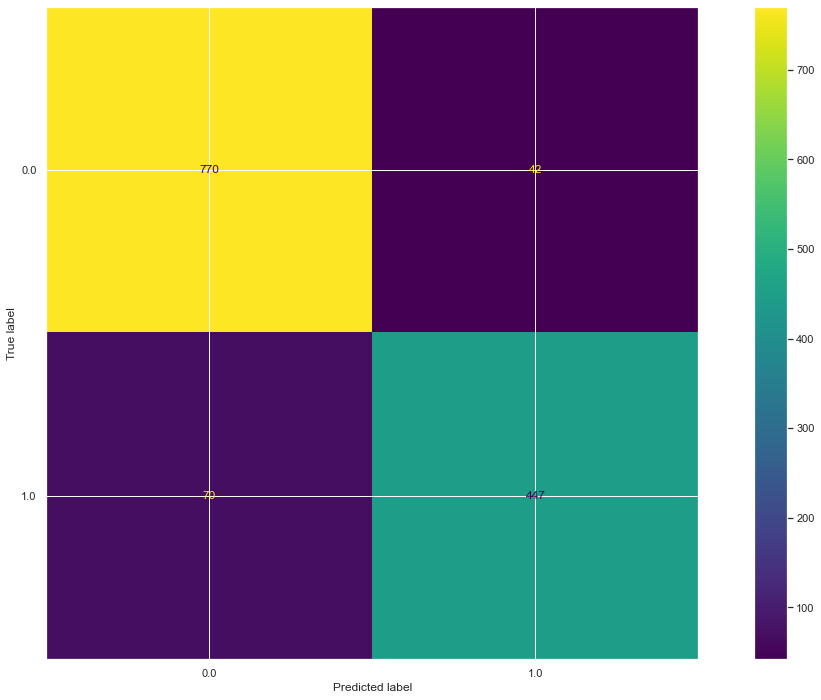


The classification report is given below:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       812
         1.0       0.91      0.86      0.89       517

    accuracy                           0.92      1329
   macro avg       0.92      0.91      0.91      1329
weighted avg       0.92      0.92      0.92      1329

Recall (Sensivity): 0.86
Specificity: 0.95
Precision: 0.91
Balanced Accuracy: 0.91
F1 Score: 0.89


In [190]:
# a helper function that returns the classifier's metrics after fitting the model and printing 
# the classifier's metrics, confusion matrics and classification report 
classifier_metrics =deriveClassifierObject('Random Forest Classifier',rf_classifier, X_train, y_train_cat, X_val, y_val_cat)

In [191]:
# add the list of the classifier metrics to the list of classification models
classificationModels.append(classifier_metrics)

In [192]:
classificationModels

[['GridSearchCV RBF Kernel SVC', 0.94, 0.91, 0.87, 0.94, 0.9, 0.9, 0.88],
 ['GridSearchCV RBF Kernel SVC With PCA transformed data',
  0.93,
  0.91,
  0.86,
  0.94,
  0.9,
  0.9,
  0.88],
 ['Random Forest Classifier', 1.0, 0.92, 0.86, 0.95, 0.91, 0.91, 0.89]]

<p>The accuracy on training and validation is 1.0 and 0.92 respectively. There is a difference of 0.08 between the training and validation accuracy scores. The model slightly over fits on the training data. Also, the F1 Score is 0.89, Recall is 0.86 and Balanced Accuracy is 0.91. Overall, with a high Recall, F1-Score and Balanced Accuracy, the model is not performing poorly.</p>

#### With Random Forest: 

- We try to decorrelate trees and increase variety between leaners by:
    - decreasing the size of the bootstrap samples, which increases diversity among trees and also increases the randomness of the random forest, which helps in reducing overfitting.
    - randomly selecting a small number of features which decreases the chance of over-selecting the same feature.

#####  first, let's use GridSearchCV to find a combination of different hyper-parameters to use:

In [193]:
parameters = dict(
min_samples_leaf = [5, 500],
min_samples_split = [5,  200],
max_depth = [5, 500, 1200],
max_features= [6, 7, 8, 9],
bootstrap= [True, False],
n_estimators = [50, 600]
)
parameters

{'min_samples_leaf': [5, 500],
 'min_samples_split': [5, 200],
 'max_depth': [5, 500, 1200],
 'max_features': [6, 7, 8, 9],
 'bootstrap': [True, False],
 'n_estimators': [50, 600]}

In [194]:
# let's initialize a RandomForestClassifier Object
rf_classifier_With_GridSearchCV = RandomForestClassifier(random_state=RANDOM_STATE)

BEST PARAMS: {'bootstrap': True, 'max_depth': 500, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 600}



The model's accuracy on training is : 0.96
The model's accuracy on validation is : 0.92

The Confusion Matrix is given below:


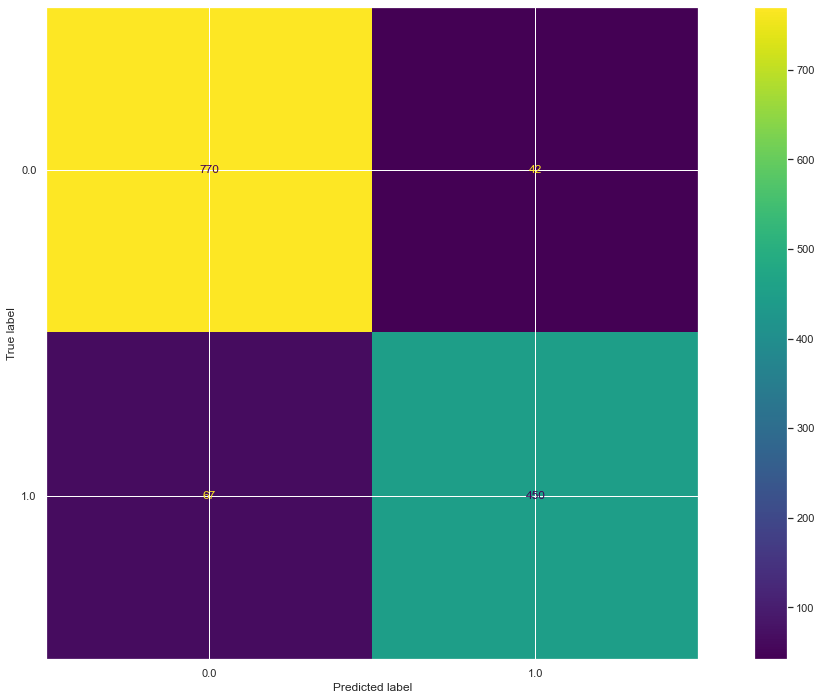


The classification report is given below:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       812
         1.0       0.91      0.87      0.89       517

    accuracy                           0.92      1329
   macro avg       0.92      0.91      0.91      1329
weighted avg       0.92      0.92      0.92      1329

Recall (Sensivity): 0.87
Specificity: 0.95
Precision: 0.91
Balanced Accuracy: 0.91
F1 Score: 0.89
Wall time: 13min 35s


In [195]:
%%time
# A helper function that returns the model's prediction accuracy on training and validation data 
# after performing GridSearchCv to tune the different hyperparameters which it uses to fit the model 
# and also prints the different metrics
classifier_metrics, rf_classifier_With_GridSearchCV = classGridSearchCV('Random Forest Classifier With Grid SearchCV', rf_classifier_With_GridSearchCV , parameters, X_train, y_train_cat, X_val, y_val_cat, 'f1')

In [196]:
# return the best estimator that was chosen by the gridsearch
rf_classifier_With_GridSearchCV

RandomForestClassifier(max_depth=500, max_features=8, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=600, random_state=0)

In [197]:
# add the list of the classifier metrics to the list of classification models
classificationModels.append(classifier_metrics)

In [198]:
classificationModels

[['GridSearchCV RBF Kernel SVC', 0.94, 0.91, 0.87, 0.94, 0.9, 0.9, 0.88],
 ['GridSearchCV RBF Kernel SVC With PCA transformed data',
  0.93,
  0.91,
  0.86,
  0.94,
  0.9,
  0.9,
  0.88],
 ['Random Forest Classifier', 1.0, 0.92, 0.86, 0.95, 0.91, 0.91, 0.89],
 ['Random Forest Classifier With Grid SearchCV',
  0.96,
  0.92,
  0.87,
  0.95,
  0.91,
  0.91,
  0.89]]

#### let's plot a bar chat showing us the features of importance for a Random Forest Classifier 

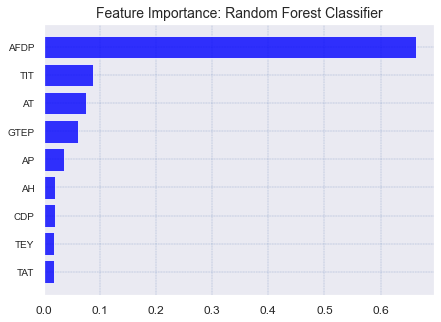

In [199]:
model_type = 'rfc' 
model_dict = {'rfc':rf_classifier_With_GridSearchCV.feature_importances_}
importances = model_dict[model_type]
indices = list(np.argsort(importances)) 
feature_names=df_X_train.columns
names = [ feature_names[i] for i in indices]

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[7,5])
ax.barh(names, importances[indices], color = 'blue', align ='center',alpha=0.8)

xticklabel_rotation = 0
plt.xticks(rotation=xticklabel_rotation,fontsize=12)

plt.yticks(fontsize=10)
ax.grid(color='b', ls = '-.', lw = 0.25)

# Title
ax.set_title("Feature Importance: Random Forest Classifier",fontsize=14)

# Show plot
plt.show()

<p>Here, we learn that AFDP, TIT, AT, GTEP and AP are the most significant features.</p>

<p>Accuracy on training and validation is 0.96 and 0.92 respectively. Also, tuning Random Forest Classifier with the perfect hyper parameters reduces the model's overfitting on the training data since there is a difference of 0.04 between training and validation accuracy which is less than the value of 0.08 we were seeing before.</p>
<p>Furthermore, Recall increased from 0.86 to 0.87, Balanced Accuracy remained at 0.91 and the F1-Score remained at 0.89.</p>

### With GradientBoosting Classifier

- We shall subsample rows, columns before creating trees like in Random Forests.
- We shall also tune the number of trees, tree depth, number of points in the leaves and the number of observations per split. 

#### we check for a combination of different parameters using GridSearchCV

In [200]:
parameters = dict(
    learning_rate = [1.0, 8.0],
    n_estimators = [50, 500],
    max_depth = [5,  100, 500],
    min_samples_split = [100, 500],
    subsample = [0.6,  0.9],
    max_features = [6, 7, 8, 9] 
)
parameters

{'learning_rate': [1.0, 8.0],
 'n_estimators': [50, 500],
 'max_depth': [5, 100, 500],
 'min_samples_split': [100, 500],
 'subsample': [0.6, 0.9],
 'max_features': [6, 7, 8, 9]}

In [201]:
# initialize the GradientBoostingClassifier object
gb_classifier_With_GridSearchCV = GradientBoostingClassifier(random_state=RANDOM_STATE)

BEST PARAMS: {'learning_rate': 1.0, 'max_depth': 5, 'max_features': 9, 'min_samples_split': 100, 'n_estimators': 50, 'subsample': 0.9}



The model's accuracy on training is : 0.99
The model's accuracy on validation is : 0.89

The Confusion Matrix is given below:


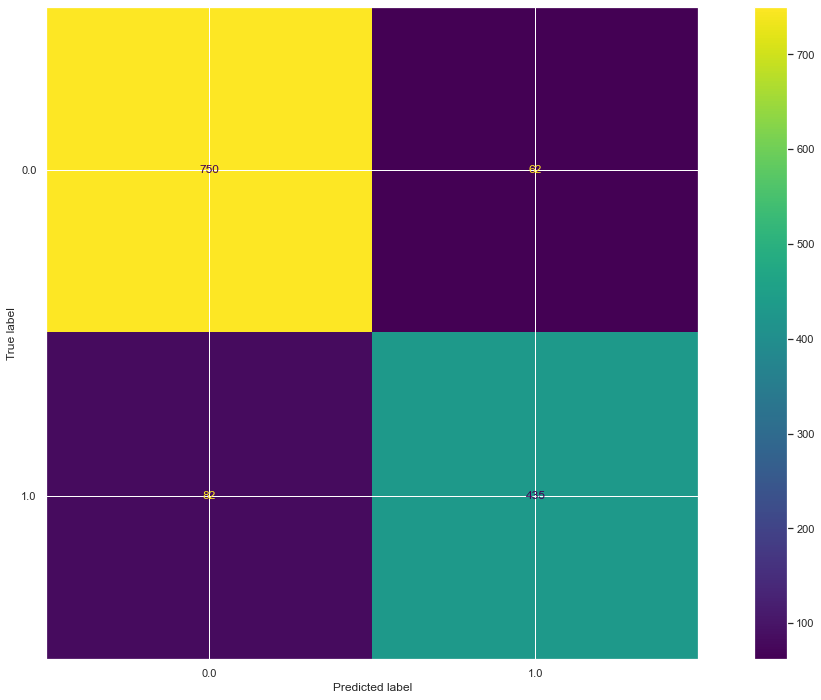


The classification report is given below:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       812
         1.0       0.88      0.84      0.86       517

    accuracy                           0.89      1329
   macro avg       0.89      0.88      0.89      1329
weighted avg       0.89      0.89      0.89      1329

Recall (Sensivity): 0.84
Specificity: 0.92
Precision: 0.88
Balanced Accuracy: 0.88
F1 Score: 0.86
Wall time: 15min 21s


In [202]:
%%time
# A helper function that returns the model's prediction accuracy on training and validation data 
# after performing GridSearchCv to tune the different hyperparameters which it uses to fit the model 
# and also prints the different metrics
classifier_metrics, gb_classifier_With_GridSearchCV = classGridSearchCV('Gradient Boosting Classifier With Grid SearchCV', gb_classifier_With_GridSearchCV, parameters, X_train, y_train_cat, X_val, y_val_cat, 'f1')

In [203]:
# this is our best model
gb_classifier_With_GridSearchCV

GradientBoostingClassifier(learning_rate=1.0, max_depth=5, max_features=9,
                           min_samples_split=100, n_estimators=50,
                           random_state=0, subsample=0.9)

In [204]:
# add the list of the classifier metrics to the list of classification models
classificationModels.append(classifier_metrics)

In [205]:
classificationModels

[['GridSearchCV RBF Kernel SVC', 0.94, 0.91, 0.87, 0.94, 0.9, 0.9, 0.88],
 ['GridSearchCV RBF Kernel SVC With PCA transformed data',
  0.93,
  0.91,
  0.86,
  0.94,
  0.9,
  0.9,
  0.88],
 ['Random Forest Classifier', 1.0, 0.92, 0.86, 0.95, 0.91, 0.91, 0.89],
 ['Random Forest Classifier With Grid SearchCV',
  0.96,
  0.92,
  0.87,
  0.95,
  0.91,
  0.91,
  0.89],
 ['Gradient Boosting Classifier With Grid SearchCV',
  0.99,
  0.89,
  0.84,
  0.92,
  0.88,
  0.88,
  0.86]]

<p>The accuracy on Training and validation is 0.99 and 0.89 respectively. Recall, F1-Score and Balanced Accuracy are 0.84, 0.86 and 0.88 respectively. So, using GradientBoost Classifier didn't improve performance on validation.</p> 

### With Voting Classifier with Hard Voting:

- Voting classifier with hard voting allows us to combine different classification algorithms with a goal of building a strong meta-classifier that balances out the individual classifier's weakness on this data set.

In [206]:
clf1=LogisticRegression(random_state=RANDOM_STATE)
clf2=RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE)
clf3=GradientBoostingClassifier(random_state=RANDOM_STATE)

In [207]:
pred_val_acc = []
pred_train_acc = []
eclf = VotingClassifier(estimators=[('lr', clf1), ('rfr', clf2), ('gboost', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], 
                      ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, X_val, y_val_cat, scoring='f1', cv=cv)
    pred_train_acc.append(cross_val_predict(clf, X_train, y_train_cat, cv=cv))
    pred_val_acc.append(cross_val_predict(clf, X_val, y_val_cat, cv=cv))
    print("Validation Accuracy: %0.5f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Validation Accuracy: 0.86969 (+/- 0.024) [Logistic Regression]
Validation Accuracy: 0.87540 (+/- 0.036) [Random Forest]
Validation Accuracy: 0.86943 (+/- 0.038) [Gradient Boosting]
Validation Accuracy: 0.87777 (+/- 0.033) [Ensemble]


In [208]:
pred_train_acc

[array([1., 0., 0., ..., 1., 1., 0.]),
 array([0., 0., 0., ..., 1., 1., 0.]),
 array([0., 0., 0., ..., 1., 1., 0.]),
 array([0., 0., 0., ..., 1., 1., 0.])]

In [209]:
pred_train_calc = 0
for pred_train_item in pred_train_acc:
    # calculate the total accuracy on training
    pred_train_calc += pred_train_item

# derive the average of the total accuracy on training.
pred_train = (pred_train_calc/len(pred_train_acc) > 0.5).astype(int)

In [210]:
pred_val_acc

[array([1., 0., 0., ..., 1., 1., 1.]),
 array([1., 0., 0., ..., 1., 0., 1.]),
 array([1., 0., 0., ..., 1., 0., 1.]),
 array([1., 0., 0., ..., 1., 0., 1.])]

In [211]:
pred_vote_calc = 0
for pred_val in pred_val_acc:
    # calculate the total accuracy on validation
    pred_vote_calc += pred_val

# derive the average of the total accuracy on validation.
pred_vote = (pred_vote_calc/len(pred_val_acc) > 0.5).astype(int)

In [212]:
pred_vote

array([1, 0, 0, ..., 1, 0, 1])

In [213]:
# Dynamically calculating Recall(Sensitivity), Specificity, Precision, Balanced Accuracy and F1-Score
TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val_cat, y_pred=pred_vote).ravel() # return the elements of the matrix as array

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1Score = 2 * ((Precision * Recall)/(Precision + Recall))

BalancedAccuracy = (Recall  + Specificity)/2

print('Recall (Sensivity): %s' %(str(roundOffValue(Recall))))
print('Specificity: %s' %(str(roundOffValue(Specificity))))
print('Precision: %s' %(str(roundOffValue(Precision))))
print('Balanced Accuracy: %s' %(str(roundOffValue(BalancedAccuracy))))
print('F1 Score: %s' %(str(roundOffValue(F1Score))))

Recall (Sensivity): 0.85
Specificity: 0.95
Precision: 0.91
Balanced Accuracy: 0.9
F1 Score: 0.88


In [214]:
votingClassifierMetrics = ['Voting Classifier With Hard voting', roundOffValue(metrics.accuracy_score(y_train_cat, pred_train)), roundOffValue(metrics.accuracy_score(y_val_cat, pred_vote)), roundOffValue(Recall), roundOffValue(Specificity), roundOffValue(Precision), roundOffValue(BalancedAccuracy), roundOffValue(F1Score)]

In [215]:
# add the list of the classifier metrics to the list of classification models
classificationModels.append(votingClassifierMetrics)

In [216]:
classificationModels

[['GridSearchCV RBF Kernel SVC', 0.94, 0.91, 0.87, 0.94, 0.9, 0.9, 0.88],
 ['GridSearchCV RBF Kernel SVC With PCA transformed data',
  0.93,
  0.91,
  0.86,
  0.94,
  0.9,
  0.9,
  0.88],
 ['Random Forest Classifier', 1.0, 0.92, 0.86, 0.95, 0.91, 0.91, 0.89],
 ['Random Forest Classifier With Grid SearchCV',
  0.96,
  0.92,
  0.87,
  0.95,
  0.91,
  0.91,
  0.89],
 ['Gradient Boosting Classifier With Grid SearchCV',
  0.99,
  0.89,
  0.84,
  0.92,
  0.88,
  0.88,
  0.86],
 ['Voting Classifier With Hard voting',
  0.92,
  0.91,
  0.85,
  0.95,
  0.91,
  0.9,
  0.88]]

<p>Here, we can see that the performance of the voting classifier with hard voting improves over the individual classifier in the 10 fold cross validation evaluation.</p>

## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



- First, let's convert the list of tuples for regression models into a panda data frame.

In [217]:
pd.set_option('display.max_columns', 100)

In [218]:
# let's format the diaply to have two decimal places
pd.set_option('display.float_format',  '{:,.2f}'.format)

In [219]:
# converting the list of tuples into a pandas data frame
df_regressors = pd.DataFrame(data=regressionModels, columns=['Model Name', 'R Squared on Training', 'R Squared on Validation', 'RMSE on training',  'RMSE on validation'])

In [220]:
# let's calculate the difference between R Squared training and validation
df_regressors['R Squared difference'] = df_regressors['R Squared on Training'] - df_regressors['R Squared on Validation']
df_regressors

,Model Name,R Squared on Training,R Squared on Validation,RMSE on training,RMSE on validation,R Squared difference
0,Linear Regression,0.66,0.65,1.27,1.39,0.01
1,Random Forest Regressor,0.96,0.76,0.42,1.15,0.20
2,Random Forest Regressor with GridSearchCV,0.79,0.75,1.00,1.18,0.04
3,Linear SVM Regressor,0.62,0.60,1.34,1.47,0.02
4,Polynomial Kernel SVM Regressor,0.74,0.73,1.12,1.21,0.01
5,RBF Kernel SVM Regressor,0.77,0.75,1.06,1.17,0.02
6,RBF Kernel SVR with GridSearch,0.79,0.76,1.00,1.15,0.03
7,Linear Regression with PCA transformed data,0.66,0.63,1.29,1.41,0.03
8,Random Forest Regressor with PCA transformed data,0.96,0.74,0.42,1.20,0.22
9,GridSearchCV Random Forest Regressor with PCA ...,0.80,0.75,0.98,1.17,0.05


In [221]:
# let's sort the data frame by the difference between R Squared on training and validation, R Squared on Training, R Squared on Validation, then RMSE on training and RMSE on validation
df_regressors_sorted = df_regressors.sort_values(by=['R Squared difference', 'R Squared on Training', 'R Squared on Validation', 'RMSE on training', 'RMSE on validation'])
df_regressors_sorted

,Model Name,R Squared on Training,R Squared on Validation,RMSE on training,RMSE on validation,R Squared difference
0,Linear Regression,0.66,0.65,1.27,1.39,0.01
16,ElasticNet With GridSearchCV,0.66,0.65,1.27,1.39,0.01
17,Stochastic Gradient Descent With GridSearchCV,0.66,0.65,1.27,1.39,0.01
4,Polynomial Kernel SVM Regressor,0.74,0.73,1.12,1.21,0.01
10,RBF Kernel SVR with PCA transformed data,0.76,0.75,1.07,1.17,0.01
3,Linear SVM Regressor,0.62,0.60,1.34,1.47,0.02
14,Linear Tree Regressor,0.77,0.75,1.04,1.18,0.02
5,RBF Kernel SVM Regressor,0.77,0.75,1.06,1.17,0.02
12,Linear Regression Performance Improvement With...,0.54,0.51,1.48,1.64,0.03
7,Linear Regression with PCA transformed data,0.66,0.63,1.29,1.41,0.03


<ul>The best regressors are:
    <li>RBF Kernel SVR with PCA transformed data.</li>
    <li>RBF Kernel SVR Regressor with GridSearch.</li>
</ul>

<p>I chose these two regressors because they have the highest $R^2$ on the validation data but also keeping mind the smallest differences in the R Squared value between training and validation.</p>

#### Using the RBF Kernel SVR with PCA transformed data

In [222]:
# output the model's prediction on the test set.
pred_test_rbf = rbf_K_SVR_With_PCA_transformed_data.predict(X_test_pca2)

In [223]:
# R^2 on the testing data
print("The model's R^2 on the training data is %.3f." %deriveRSquared(y_test, pred_test_rbf))

The model's R^2 on the training data is 0.589.


In [224]:
# Root Mean Squared Error (RMSE) on testing data
print("The model's Root Mean Squared Error (RMSE) on the training data is %.3f." %deriveRMSE(y_test, pred_test_rbf))

The model's Root Mean Squared Error (RMSE) on the training data is 1.496.


#### Using RBF Kernel SVR Regressor with GridSearch

In [225]:
# output the model's prediction on the test set.
pred_test = gridSCV_rbf_K_SVR.predict(X_test)

In [226]:
# R^2 on the testing data
print("The model's R^2 on the training data is %.3f." %deriveRSquared(y_test, pred_test))

The model's R^2 on the training data is 0.576.


In [227]:
# Root Mean Squared Error (RMSE) on testing data
print("The model's Root Mean Squared Error (RMSE) on the training data is %.3f." %deriveRMSE(y_test, pred_test))

The model's Root Mean Squared Error (RMSE) on the training data is 1.519.


In [228]:
# let's create a list of RSquared values
listOfRSquared=[roundOffValue(deriveRSquared(y_test, pred_test_rbf)), roundOffValue(deriveRSquared(y_test, pred_test)) ]

In [229]:
# let's create a list of RMSE values of the two best regression models
listOfRMSE =[roundOffValue(deriveRMSE(y_test, pred_test_rbf)), roundOffValue(deriveRMSE(y_test, pred_test))]

### let's create a table summarizing the results on the test set for regression.

In [230]:
#let's create a mask for the best two regressors.
condition_mask = df_regressors_sorted['Model Name'].isin(['RBF Kernel SVR with PCA transformed data', 'RBF Kernel SVR with GridSearch'])
df_best_linear_models = df_regressors_sorted[condition_mask]
# create a copy of the data set
df_best_linear_m_final = df_best_linear_models.copy()
#df_best_linear_m_final

In [231]:
df_best_linear_m_final['R Squared on testing'] = listOfRSquared
df_best_linear_m_final['RMSE on testing'] = listOfRMSE

In [232]:
# display the items of the data set
df_best_linear_m_final

,Model Name,R Squared on Training,R Squared on Validation,RMSE on training,RMSE on validation,R Squared difference,R Squared on testing,RMSE on testing
10,RBF Kernel SVR with PCA transformed data,0.76,0.75,1.07,1.17,0.01,0.59,1.50
6,RBF Kernel SVR with GridSearch,0.79,0.76,1.00,1.15,0.03,0.58,1.52


<p>From the above table, <b>RBF Kernel Support Vector Regressor build with PCA transformed data</b> is the best model since PCA eliminates multicollinearity between features by combining highly correlated variables into a set of un correlated variables and this is the situation we are in since our data has a lot of strongly correlated variables. Also, it has the highest $R^2$ of 0.59 and lower RMSE of 1.50 on testing.</p> <p>Furthermore, for the second best model, <b>RBF Kernel SVR with GridSearch</b> increased $R^2$, which was part of the validation performance of the model in Question 5.</p>

#### Before choosing the best 2 classifiers among the trained classification models, we need to convert the list of classification models into pandas.

In [233]:
df_classifiers = pd.DataFrame(data=classificationModels, columns=['ModelName', 'AccuracyOnTraining', 'AccuracyOnval', 'RecallOnVal', 'SpecificityOnVal', 'PrecisionOnVal', 'BalancedAccuracyOnVal', 'F1ScoreOnVal'])
df_classifiers

,ModelName,AccuracyOnTraining,AccuracyOnval,RecallOnVal,SpecificityOnVal,PrecisionOnVal,BalancedAccuracyOnVal,F1ScoreOnVal
0,GridSearchCV RBF Kernel SVC,0.94,0.91,0.87,0.94,0.90,0.90,0.88
1,GridSearchCV RBF Kernel SVC With PCA transform...,0.93,0.91,0.86,0.94,0.90,0.90,0.88
2,Random Forest Classifier,1.00,0.92,0.86,0.95,0.91,0.91,0.89
3,Random Forest Classifier With Grid SearchCV,0.96,0.92,0.87,0.95,0.91,0.91,0.89
4,Gradient Boosting Classifier With Grid SearchCV,0.99,0.89,0.84,0.92,0.88,0.88,0.86
5,Voting Classifier With Hard voting,0.92,0.91,0.85,0.95,0.91,0.90,0.88


In [234]:
# let's calculate the difference between Accuracy on training and validation
df_classifiers['Differencebtn_trainAcc&ValAcc'] = df_classifiers['AccuracyOnTraining'] - df_classifiers['AccuracyOnval']
#df_classifiers

- let's sort the data frame by RecallOnVal, F1-Score, Balanced Accuracy and Precision

In [235]:
df_classifiers_Sorted = df_classifiers.sort_values(by=['RecallOnVal', 'F1ScoreOnVal', 'BalancedAccuracyOnVal', 'PrecisionOnVal'])
df_classifiers_Sorted

,ModelName,AccuracyOnTraining,AccuracyOnval,RecallOnVal,SpecificityOnVal,PrecisionOnVal,BalancedAccuracyOnVal,F1ScoreOnVal,Differencebtn_trainAcc&ValAcc
4,Gradient Boosting Classifier With Grid SearchCV,0.99,0.89,0.84,0.92,0.88,0.88,0.86,0.10
5,Voting Classifier With Hard voting,0.92,0.91,0.85,0.95,0.91,0.90,0.88,0.01
1,GridSearchCV RBF Kernel SVC With PCA transform...,0.93,0.91,0.86,0.94,0.90,0.90,0.88,0.02
2,Random Forest Classifier,1.00,0.92,0.86,0.95,0.91,0.91,0.89,0.08
0,GridSearchCV RBF Kernel SVC,0.94,0.91,0.87,0.94,0.90,0.90,0.88,0.03
3,Random Forest Classifier With Grid SearchCV,0.96,0.92,0.87,0.95,0.91,0.91,0.89,0.04


<ul>Based on the results of our table after sorting, the two best classifiers are:
    <li>Voting Classifier with Hard voting (Ensemble)</li>
    <li>GridSearchCV RBF Kernel SVC With PCA transformed data.</li>
</ul>
<p>I selected these two classifiers based on the F1 Score, Precision, Balanced Accuracy, Recall values and the difference between the values of training and validation accuracy. We see that the <b>Ensemble</b>, and <b>the RBF Kernel SVC </b>optimized with GridSearchCV and built with the PCA transformed data have low values of differences between training and validation accuracy which are 0.01 and 0.02 respectively.</p>

In [236]:
# We initilalize a list of the best two classifiers tested on the testing data set.
best_two_classifiers_on_Test=[]

#### Using the Voting classifier with Hard Voting (Ensemble)

In [237]:
pred_test_acc = []
eclf = VotingClassifier(estimators=[('lr', clf1), ('rfr', clf2), ('gboost', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], 
                      ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, X_test, y_test_cat, scoring='f1', cv=cv)
    pred_test_acc.append(cross_val_predict(clf, X_test, y_test_cat, cv=cv))
    print("Testing Accuracy: %0.5f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Testing Accuracy: 0.87543 (+/- 0.045) [Logistic Regression]
Testing Accuracy: 0.86916 (+/- 0.052) [Random Forest]
Testing Accuracy: 0.85653 (+/- 0.058) [Gradient Boosting]
Testing Accuracy: 0.86354 (+/- 0.056) [Ensemble]


In [238]:
pred_test_calc = 0
for pred_test_item in pred_test_acc:
    # calculate the total accuracy on testing
    pred_test_calc += pred_test_item
    
    
# derive the average of the total accuracy on testing.
pred_test = (pred_test_calc/len(pred_test_acc) > 0.5).astype(int)

In [239]:
# Dynamically calculating Recall(Sensitivity), Specificity, Precision, Balanced Accuracy and F1-Score
TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_test_cat, y_pred=pred_test).ravel() # return the elements of the matrix as array

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1Score = 2 * ((Precision * Recall)/(Precision + Recall))

BalancedAccuracy = (Recall  + Specificity)/2

print('Recall (Sensivity): %s' %(str(roundOffValue(Recall))))
print('Specificity: %s' %(str(roundOffValue(Specificity))))
print('Precision: %s' %(str(roundOffValue(Precision))))
print('Balanced Accuracy: %s' %(str(roundOffValue(BalancedAccuracy))))
print('F1 Score: %s' %(str(roundOffValue(F1Score))))

Recall (Sensivity): 0.84
Specificity: 0.94
Precision: 0.89
Balanced Accuracy: 0.89
F1 Score: 0.87


In [240]:
votingClassifierMetrics_testing = ['Voting Classifier With Hard voting on testing set', roundOffValue(metrics.accuracy_score(y_test_cat, pred_test)), roundOffValue(Recall), roundOffValue(Specificity), roundOffValue(Precision), roundOffValue(BalancedAccuracy), roundOffValue(F1Score)]

In [241]:
# adding the metrics list of the voting Classifier metrics on testing to the list of list, best_two_classifiers_on_Test
best_two_classifiers_on_Test.append(votingClassifierMetrics_testing)

In [242]:
best_two_classifiers_on_Test

[['Voting Classifier With Hard voting on testing set',
  0.9,
  0.84,
  0.94,
  0.89,
  0.89,
  0.87]]

#### Using GridSearchCV RBF Kernel SVC With PCA transformed data

In [243]:
# predict the accuracy on the testing transformed data set using PCA
y_pred_test = gridSearchCV_rbf_K_SVC_With_PCA_transformed_data.predict(X_test_pca2)


The Confusion Matrix is given below:


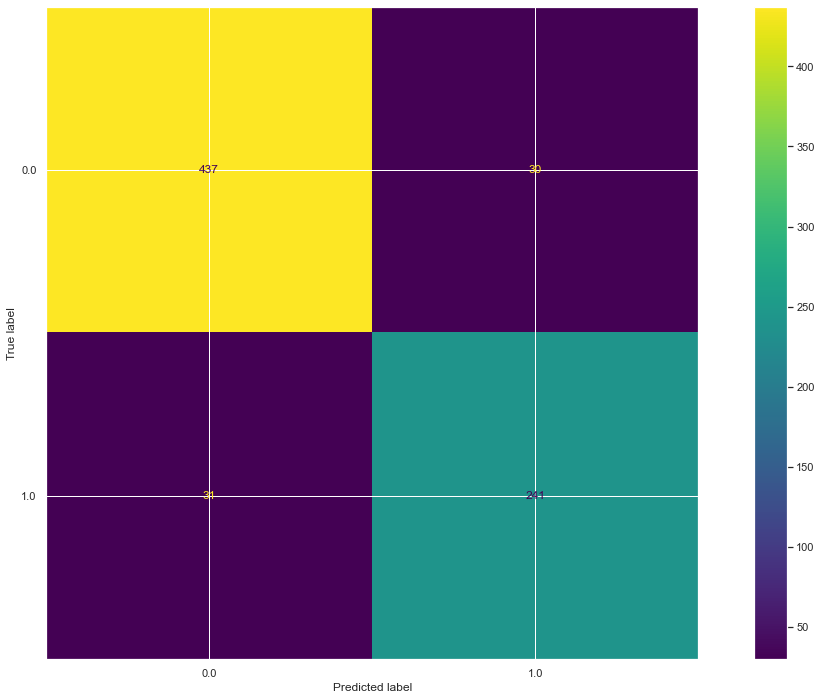


The classification report is given below:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       467
         1.0       0.89      0.89      0.89       272

    accuracy                           0.92       739
   macro avg       0.91      0.91      0.91       739
weighted avg       0.92      0.92      0.92       739

Recall (Sensivity): 0.89
Specificity: 0.94
Precision: 0.89
Balanced Accuracy: 0.91
F1 Score: 0.89


In [244]:
class_Metrics=deriveConfusionMatrix(y_test_cat, y_pred_test)
listOfMetrics = list(class_Metrics) # convert the tuple into a list
all_metrics = ['GridSearchCV RBF Kernel SVC With PCA transformed data', 
                   roundOffValue(metrics.accuracy_score(y_true=y_test_cat, y_pred=y_pred_test)),  
                  ]
# loop through the items of the list and add them to the list of all metrics
for item in listOfMetrics: 
    all_metrics.append(item)

In [245]:
# adding the all_metrics list to the list of list, best_two_classifiers_on_Test
best_two_classifiers_on_Test.append(all_metrics)

In [246]:
best_two_classifiers_on_Test

[['Voting Classifier With Hard voting on testing set',
  0.9,
  0.84,
  0.94,
  0.89,
  0.89,
  0.87],
 ['GridSearchCV RBF Kernel SVC With PCA transformed data',
  0.92,
  0.89,
  0.94,
  0.89,
  0.91,
  0.89]]

In [247]:
# let's create a mask for the best two classifiers on training and validation
classifier_mask = df_classifiers_Sorted['ModelName'].isin(['Voting Classifier With Hard voting', 'GridSearchCV RBF Kernel SVC With PCA transformed data'])
df_best_classifier_model = df_classifiers_Sorted[classifier_mask]

# let's create a copy of the data set.
df_best_two_classifiers = df_best_classifier_model.copy()

- Two best classifiers on training and validation data sets.

In [248]:
df_best_two_classifiers

,ModelName,AccuracyOnTraining,AccuracyOnval,RecallOnVal,SpecificityOnVal,PrecisionOnVal,BalancedAccuracyOnVal,F1ScoreOnVal,Differencebtn_trainAcc&ValAcc
5,Voting Classifier With Hard voting,0.92,0.91,0.85,0.95,0.91,0.90,0.88,0.01
1,GridSearchCV RBF Kernel SVC With PCA transform...,0.93,0.91,0.86,0.94,0.90,0.90,0.88,0.02


#### So, the best two classifiers on the testing data:

In [249]:
df_classifiers_test = pd.DataFrame(data=best_two_classifiers_on_Test, columns=['ModelName', 'AccuracyOnTest', 'RecallOnTest', 'SpecificityOnTest', 'PrecisionOnTest', 'BalancedAccuracyOnTest', 'F1ScoreOnTest'])
df_classifiers_test # displaying the contents of the data frame

,ModelName,AccuracyOnTest,RecallOnTest,SpecificityOnTest,PrecisionOnTest,BalancedAccuracyOnTest,F1ScoreOnTest
0,Voting Classifier With Hard voting on testing set,0.90,0.84,0.94,0.89,0.89,0.87
1,GridSearchCV RBF Kernel SVC With PCA transform...,0.92,0.89,0.94,0.89,0.91,0.89


<p>From the data frame above, <b>RBF Kernel Support Vector Classifier(SVC)</b> optimized with GridSearchCV and built with PCA transformed data is the best model since using the testing data set it has a high Recall of 0.89, Specificity of 0.94, Balanced Accuracy of 0.91 and F1 Score of 0.89. These results are expected because using the PCA transformed data, all the correlated variables have been eliminated through PCA.</p>

- What did you learn in this project? Any suggestions?

   - I learnt to explore several linear regressors using the given data set and from this exercise I should be in position to tackle any regression project. Also, I learnt using $R^2$ and $RMSE$ to measure the performance of any linear regression model used.
   - Through using GridSearchCV, I learnt tuning the performance of any linear regression model.
   - I learnt to transform the data using PCA. 
   - I learnt to use my critical thinking skills on how to select the best model. 
   - I learnt to convert a numerical target variable into binary category variable with the goal of doing classification.
   - I learnt how to build model using the PCA tranasformed data set.
   - I learnt how to split a data set into training and testing and again splitting the training and validation with the goal of using the testing data set only once after the model implementation and evaluation, which uses the training and validation data sets; here we only use the testing data set at the end after implementing and evaluating your model.
   - Finally, I also learnt how to explore different ways of improving the performance of the linear regressors and classifiers. 

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_